<a href="https://colab.research.google.com/github/Jordyn114/commit-test/blob/master/Copy_of_fitting_a_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you're running this in Google Colab, you can click "Copy to Drive" (above &#8593;) or go to **File > Save a Copy in Drive** so you'll have your own version to work on. That requires a Google login.  
<hr/>

# Fitting A Model   
This is a walkthrough for analyzing the problem presented in the [Fitting a Model tutorial](https://docs.google.com/document/d/1m403giYjW_YQnUd6h55BgoILSXM5sfMpDl3piPgTWpo/edit?usp=sharing). We'll use Dr. Natasha Holmes's *Statistics Summary* (linked in the course website) as a guide for how to analyze data in this course. This notebook shows how to do use Python to do the calculations in Section IV: *Fitting by the Method of Weighted Least-Squares*.

If you need to start over from scratch, open a [clean copy of this activity](https://colab.research.google.com/github/adamlamee/UCF_labs/blob/master/fitting_a_model.ipynb). If you need a refresher on how to execute this notebook, try the [intro activity](https://colab.research.google.com/github/adamlamee/UCF_labs/blob/master/intro.ipynb).    

In [59]:
# imports the software you'll use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

## Setting up the data table

In [60]:
# as an example, these are the same measurements from the Fitting a Model tutorial you already did
lab_data = pd.DataFrame()               # don't edit this line
# edit the column names and measured values
lab_data['distance (cm)'] = (0, 5)         # the levels of the independent variable, IV. You can have more than 3
lab_data['trial 1'] = (176.17, 91)   # these trials should be in the same order as the levels of your IV
lab_data['trial 2'] = (178.6, 87.8)   # more trials
lab_data['trial 3'] = (177.74, 89.33)   # you'll need at least three trials for each level of the IV
# lab_data['trial 4'] = (.3, 4.1, 3.4)   # More data is usually better. Keep adding rows for additional trials
lab_data                                # shows your data table

,distance (cm),trial 1,trial 2,trial 3
0,0,176.17,178.6,177.74
1,5,91.00,87.8,89.33


Error #1: Before you go on, compare the data table output by the code above to the data table in the Fitting a Model tutorial. There are a few (intentional) typos. Fix those first and run the cell again before moving on.

In [61]:
# adds a column for mean and calculates the mean for each row
lab_data['mean'] = lab_data.loc[:,'trial 1': 'trial 3'].mean(axis=1) # loc looks at [all rows, range of columns]
lab_data                                                             # shows lab_data again

,distance (cm),trial 1,trial 2,trial 3,mean
0,0,176.17,178.6,177.74,177.503333
1,5,91.00,87.8,89.33,89.376667


In [62]:
# adds a column for st dev, but there's a typo you'll need to fix. It isn't using all four trials.
lab_data['st dev'] = lab_data.loc[:,'trial 1': 'trial 3'].std(axis=1) # theres a typo in this line!
lab_data                                                              # shows lab_data again

,distance (cm),trial 1,trial 2,trial 3,mean,st dev
0,0,176.17,178.6,177.74,177.503333,1.232166
1,5,91.00,87.8,89.33,89.376667,1.600510


Error #2: The st dev calculation above isn't correct. Compare it with the line that calculated the mean to see what to edit.  

In [63]:
n = 3   # your number of trials?
lab_data['st unc'] = lab_data['st dev'] / np.sqrt(n) # wow, that's not the equation for st unc
lab_data                                           # shows lab_data again

,distance (cm),trial 1,trial 2,trial 3,mean,st dev,st unc
0,0,176.17,178.6,177.74,177.503333,1.232166,0.711391
1,5,91.00,87.8,89.33,89.376667,1.600510,0.924055


Error #3: The code cell above has typos in the first and second lines. 

<hr/>

Now's a good time to take a look at your data table above and check that it all makes sense. Maybe do the calculations for one row by hand to check. Who are we kidding? You may just want to trust a bunch of code given to you by someone charged with teaching you a lesson. But if it all looks good ...  
## Fitting a model to the data  

That's the last of the intentional typos. The rest of the code will require you to choose a model function and editing some parameters of the code that makes the graphs.  

In [64]:
# this cell is to show how we reached our coefficients
# since we only have 2 IV levels, there exists some straight line (linear model) that connects the two means. we can find this line with the slope formula:
slope = (89.376667 - 177.503333) / (5 - 0)
print("The slope is", slope)
# choose a point with our slope to plug into the slope-intercept equation: 89.376667 = slope * 5 + intercept
intercept = 89.376667 - slope * 5
print("The intercept is", intercept)

The slope is -17.6253332
The intercept is 177.503333


In [65]:
# this calculates the model y_values using your x-values and coefficients

a = slope  # the first coefficient in your model function; change this all you want
b = intercept   # the second coefficient in your model function; change this, too

def model_function(x,a,b):      # only have one uncommented function below
    y = a * x + b              # this would make a linear model
    #y = a * (x**2) + b         # this would make a quadratic model
    #y = a * np.log(x) + b       # this is numpy's ln function, though it's typed log()
    return y

lab_data['model y-values'] = model_function(lab_data['distance (cm)'],a,b)    # adds a column to your dataframe
lab_data                                                             # shows lab_data again

,distance (cm),trial 1,trial 2,trial 3,mean,st dev,st unc,model y-values
0,0,176.17,178.6,177.74,177.503333,1.232166,0.711391,177.503333
1,5,91.00,87.8,89.33,89.376667,1.600510,0.924055,89.376667


In [66]:
# adds a column for residuals (the difference between each mean and the model)
lab_data['residuals'] = lab_data['mean'] - lab_data['model y-values']
lab_data['res^2/stunc^2'] = lab_data['residuals']**2 / lab_data['st unc']**2
lab_data                             # shows the data table again

,distance (cm),trial 1,trial 2,trial 3,mean,st dev,st unc,model y-values,residuals,res^2/stunc^2
0,0,176.17,178.6,177.74,177.503333,1.232166,0.711391,177.503333,3.333333e-07,2.195534e-13
1,5,91.00,87.8,89.33,89.376667,1.600510,0.924055,89.376667,-3.333333e-07,1.301253e-13


In [67]:
# the chi-squared value for your current model is ...
chi_sq = lab_data['res^2/stunc^2'].mean()
print("The chi-sq for this model function is ... ", np.round(chi_sq, 2))

The chi-sq for this model function is ...  0.0


A smaller chi-sq means a better fit. Now is a good time to go back and try different values for the model coefficients, recalculate the chi-sq, and see if looks any better. Try that a few times to reduce the chi-sq as much as you can. You're probably dying to see what it looks like, right? 

<hr/>

## Visualizing the Model  

A **scatterplot** is pretty standard when your independent variable has levels that are numeric, like distances or lengths. Want to customize this type of plot even more? See matplotlib's [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and [errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) pages.

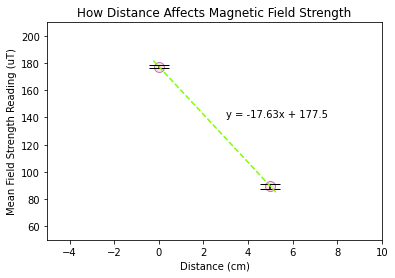

In [68]:
# edit these if you used diffferent column headings
x_values = lab_data['distance (cm)']        # which column goes on your x-axis?
y_values = lab_data['mean']        # which column goes on your y-axis?
errorbars = 2*lab_data['st unc']  # this is incorrect; edit this to be twice the std unc

# this part plots the data
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, color='pink', alpha=.5, edgecolor='purple', s=100, label='who am I?')
ax.errorbar(x_values, y_values, yerr=errorbars, label='erraaaar!', ecolor='black', capsize=10, fmt='none')

# this part plots the model function
model_x = np.linspace(min(ax.get_xlim()),max(ax.get_xlim()))  # generates evenly spaced x-values to plot
model_y = model_function(model_x,a,b)                         # uses those x-values to make model y-values to plot
ax.plot(model_x, model_y, color= 'chartreuse', label='model', linestyle="--")    # makes a lineplot of the model

# edit these so your plot looks nice
ax.set_xlabel('Distance (cm)')
ax.set_ylabel('Mean Field Strength Reading (uT)')
ax.set_title('How Distance Affects Magnetic Field Strength')
ax.set_xlim(-5,10)
ax.set_ylim(50,210)
ax.grid(False)
ax.text(3, 140, "y = " + str(np.round(slope, 2)) + "x + " + str(np.round(intercept, 2)))    # add text to the plot at coords x,y,"text"
#ax.legend()                                                    # do you want a legend?
plt.show()